# Load Packages

In [1]:
# Primary Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and Clean Data

In [2]:
df_tweets = pd.read_csv('coviddata/tweets_clean.csv')
df_abstract = pd.read_csv('coviddata/coviddata.csv')

In [3]:
df_tweets.head()

,twitternames_tweets
0,@dfpwriter @DrAdrianHeald @nurse_marcus eg htt...
1,RT @goyoiraola: Nuevo estudio sugiere que la m...
2,@PoliticJeremiah @applefodder @zeezaluh @TheRi...
3,@salocinuy https://t.co/J8SxbbKoyi
4,RT @daniel_bilar: #LANL Spike mutation D614G #...


In [4]:
df_abstract.head()

,id,downloads,title,url,biorxiv_url,doi,category,first_posted,abstract,authors,video,tweets,news,blogs,facebook,wikipedia
0,81793,123982,Spike mutation pipeline reveals the emergence ...,https://api.rxivist.org/v1/papers/81793,https://www.biorxiv.org/content/10.1101/2020.0...,10.1101/2020.04.29.069054,evolutionary-biology,2020-04-30,We have developed an analysis pipeline to faci...,"[{'id': 538234, 'name': 'Bette Korber'}, {'id'...",1,6645,301,21,12,1
1,77431,77885,Comparative analyses of SAR-CoV2 genomes from ...,https://api.rxivist.org/v1/papers/77431,https://www.biorxiv.org/content/10.1101/2020.0...,10.1101/2020.03.21.001586,bioinformatics,2020-03-21,The ongoing pandemic of the coronavirus diseas...,"[{'id': 395276, 'name': 'Rahila Sardar'}, {'id...",0,1631,3,0,0,0
2,76531,11543,The inhaled corticosteroid ciclesonide blocks ...,https://api.rxivist.org/v1/papers/76531,https://www.biorxiv.org/content/10.1101/2020.0...,10.1101/2020.03.11.987016,microbiology,2020-03-12,"Steroid compounds, which are expected to have ...","[{'id': 602221, 'name': 'Shutoku Matsuyama'}, ...",0,355,0,1,2,0
3,76954,7232,Emergence of RBD mutations in circulating SARS...,https://api.rxivist.org/v1/papers/76954,https://www.biorxiv.org/content/10.1101/2020.0...,10.1101/2020.03.15.991844,microbiology,2020-03-17,A novel coronavirus SARS-CoV-2 is associated w...,"[{'id': 604518, 'name': 'Junxian Ou'}, {'id': ...",0,134,1,1,0,0
4,72955,5664,Preliminary identification of potential vaccin...,https://api.rxivist.org/v1/papers/72955,https://www.biorxiv.org/content/10.1101/2020.0...,10.1101/2020.02.03.933226,bioinformatics,2020-02-04,The beginning of 2020 has seen the emergence o...,"[{'id': 582677, 'name': 'Syed Faraz Ahmed'}, {...",0,63,0,0,1,0


In [5]:
df_abstract.shape

(18, 16)

In [6]:
df_abstract.columns

Index(['id', 'downloads', 'title', 'url', 'biorxiv_url', 'doi', 'category',
       'first_posted', 'abstract', 'authors', 'video', 'tweets', 'news',
       'blogs', 'facebook', 'wikipedia'],
      dtype='object')

# Installing gensim packages for topic modeling

In [7]:
!pip install gensim
!pip install pyLDAvis
import nltk
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

import gensim
from gensim import corpora
from gensim.models import CoherenceModel

# Plotting tools

import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Topic Modeling

## Cleaning and Preprocessing for COVID Tweets on Articles in BioRxIV

Remove the punctuations, stopwords and normalize the corpus.

In [8]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in df_tweets['twitternames_tweets']] 
doc_clean

[['dfpwriter', 'dradrianheald', 'nursemarcus', 'eg', 'httpstco7orzhtdtbz'],
 ['rt',
  'goyoiraola',
  'nuevo',
  'estudio',
  'sugiere',
  'que',
  'la',
  'mutación',
  'd614g',
  'conferiría',
  'una',
  'mayor',
  'capacidad',
  'de',
  'transmisión',
  'al',
  'sarscov2',
  'los',
  'genomas',
  'que',
  'hem…'],
 ['politicjeremiah',
  'applefodder',
  'zeezaluh',
  'therightmelissa',
  'realdonaldtrump',
  'wait',
  'even',
  'saying',
  'here',
  'literal',
  'name',
  'covid',
  'sarscov2',
  'httpstco0bonct7svh',
  'study',
  'article',
  'link',
  'to',
  'mutation',
  'occured',
  'europe'],
 ['salocinuy', 'httpstcoj8sxbbkoyi'],
 ['rt',
  'danielbilar',
  'lanl',
  'spike',
  'mutation',
  'd614g',
  'ncov2019',
  'strain',
  'ace2',
  'delc',
  'allele',
  'easier',
  'entry',
  'e',
  'asian',
  'euro',
  'norams',
  'likely',
  'r…'],
 ['alexiscossette',
  'une',
  'étude',
  'nonrevisée',
  'par',
  'le',
  'paires',
  'mais',
  'unavant',
  'goûthttpstcompkt9bkrzj'],
 ['

In [9]:
df_tweets['clean_tweets'] = doc_clean

In [10]:
df_tweets.head()

,twitternames_tweets,clean_tweets
0,@dfpwriter @DrAdrianHeald @nurse_marcus eg htt...,"[dfpwriter, dradrianheald, nursemarcus, eg, ht..."
1,RT @goyoiraola: Nuevo estudio sugiere que la m...,"[rt, goyoiraola, nuevo, estudio, sugiere, que,..."
2,@PoliticJeremiah @applefodder @zeezaluh @TheRi...,"[politicjeremiah, applefodder, zeezaluh, theri..."
3,@salocinuy https://t.co/J8SxbbKoyi,"[salocinuy, httpstcoj8sxbbkoyi]"
4,RT @daniel_bilar: #LANL Spike mutation D614G #...,"[rt, danielbilar, lanl, spike, mutation, d614g..."


## Preparing Document-Term Matrix

In [12]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(df_tweets['clean_tweets'])

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix1 = [dictionary.doc2bow(doc) for doc in df_tweets['clean_tweets']]
doc_term_matrix1

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1)],
 [(21, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1)],
 [(45, 1), (46, 1)],
 [(8, 1),
  (20, 1),
  (34, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1)],
 [(63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1)],
 [(20, 1),
  (34, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1)],
 [

## Cleaning and Preprocessing for Abstracts

In [14]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean2 = [clean(doc).split() for doc in df_abstract['abstract']] 
doc_clean2

[['developed',
  'analysis',
  'pipeline',
  'facilitate',
  'realtime',
  'mutation',
  'tracking',
  'sarscov2',
  'focusing',
  'initially',
  'spike',
  's',
  'protein',
  'mediates',
  'infection',
  'human',
  'cell',
  'target',
  'vaccine',
  'strategy',
  'antibodybased',
  'therapeutic',
  'date',
  'identified',
  'fourteen',
  'mutation',
  'spike',
  'accumulating',
  'mutation',
  'considered',
  'broader',
  'phylogenetic',
  'context',
  'geographically',
  'time',
  'provide',
  'early',
  'warning',
  'system',
  'reveal',
  'mutation',
  'may',
  'confer',
  'selective',
  'advantage',
  'transmission',
  'resistance',
  'intervention',
  'one',
  'evaluated',
  'evidence',
  'positive',
  'selection',
  'implication',
  'mutation',
  'explored',
  'structural',
  'modeling',
  'mutation',
  'spike',
  'd614g',
  'urgent',
  'concern',
  'beginning',
  'spread',
  'europe',
  'early',
  'february',
  'introduced',
  'new',
  'region',
  'repeatedly',
  'rapidly',
  

In [15]:
df_abstract['clean_abstract'] = doc_clean2

In [16]:
df_abstract.head()

,id,downloads,title,url,biorxiv_url,doi,category,first_posted,abstract,authors,video,tweets,news,blogs,facebook,wikipedia,clean_abstract
0,81793,123982,Spike mutation pipeline reveals the emergence ...,https://api.rxivist.org/v1/papers/81793,https://www.biorxiv.org/content/10.1101/2020.0...,10.1101/2020.04.29.069054,evolutionary-biology,2020-04-30,We have developed an analysis pipeline to faci...,"[{'id': 538234, 'name': 'Bette Korber'}, {'id'...",1,6645,301,21,12,1,"[developed, analysis, pipeline, facilitate, re..."
1,77431,77885,Comparative analyses of SAR-CoV2 genomes from ...,https://api.rxivist.org/v1/papers/77431,https://www.biorxiv.org/content/10.1101/2020.0...,10.1101/2020.03.21.001586,bioinformatics,2020-03-21,The ongoing pandemic of the coronavirus diseas...,"[{'id': 395276, 'name': 'Rahila Sardar'}, {'id...",0,1631,3,0,0,0,"[ongoing, pandemic, coronavirus, disease, 2019..."
2,76531,11543,The inhaled corticosteroid ciclesonide blocks ...,https://api.rxivist.org/v1/papers/76531,https://www.biorxiv.org/content/10.1101/2020.0...,10.1101/2020.03.11.987016,microbiology,2020-03-12,"Steroid compounds, which are expected to have ...","[{'id': 602221, 'name': 'Shutoku Matsuyama'}, ...",0,355,0,1,2,0,"[steroid, compound, expected, dual, function, ..."
3,76954,7232,Emergence of RBD mutations in circulating SARS...,https://api.rxivist.org/v1/papers/76954,https://www.biorxiv.org/content/10.1101/2020.0...,10.1101/2020.03.15.991844,microbiology,2020-03-17,A novel coronavirus SARS-CoV-2 is associated w...,"[{'id': 604518, 'name': 'Junxian Ou'}, {'id': ...",0,134,1,1,0,0,"[novel, coronavirus, sarscov2, associated, cur..."
4,72955,5664,Preliminary identification of potential vaccin...,https://api.rxivist.org/v1/papers/72955,https://www.biorxiv.org/content/10.1101/2020.0...,10.1101/2020.02.03.933226,bioinformatics,2020-02-04,The beginning of 2020 has seen the emergence o...,"[{'id': 582677, 'name': 'Syed Faraz Ahmed'}, {...",0,63,0,0,1,0,"[beginning, 2020, seen, emergence, covid19, ou..."


In [17]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary2 = corpora.Dictionary(df_abstract['clean_abstract'])

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix2 = [dictionary2.doc2bow(doc) for doc in df_abstract['clean_abstract']]
doc_term_matrix2

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 2),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 1),
  (23, 1),
  (24, 2),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 2),
  (37, 1),
  (38, 1),
  (39, 2),
  (40, 1),
  (41, 2),
  (42, 2),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 6),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 2),
  (68, 1),
  (69, 1),
  (70, 3),
  (71, 1),
  (72, 1),
  (73, 2),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 2),
  (82, 1),
  (83, 1),
  (84, 1)],
 [(2, 3),
  (3, 3),
  (35, 1),
  (39, 2),
  (45, 1),
  (49, 2),
  (52, 1),

## Creating the LDA Models

In [18]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix.
ldamodel1 = Lda(doc_term_matrix1, num_topics=10, id2word = dictionary, passes=100, random_state=42)

ldamodel2 = Lda(doc_term_matrix2, num_topics=10, id2word = dictionary2, passes=100, random_state=42)


Perplexity and Topic Coherence Score

In [19]:
# Compute Coherence Score
coherence_model_lda1 = CoherenceModel(model=ldamodel1, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_lda1 = coherence_model_lda1.get_coherence()
print('\nCoherence Score: ', coherence_lda1)


Coherence Score:  0.4119790072273622


In [21]:
# Compute Coherence Score for abstract
coherence_model_lda2 = CoherenceModel(model=ldamodel2, texts=doc_clean2, dictionary=dictionary2, coherence='c_v')
coherence_lda2 = coherence_model_lda2.get_coherence()
print('\nCoherence Score: ', coherence_lda2)


Coherence Score:  0.45829004680797036


Topic - Word Distribution

In [22]:
print(ldamodel1.print_topics(num_topics=10, num_words=10))

[(0, '0.022*"covid19" + 0.019*"indicate" + 0.019*"mpro" + 0.019*"simulation" + 0.018*"target" + 0.016*"strain" + 0.016*"inhibitor" + 0.016*"viable" + 0.016*"smallmolecule" + 0.015*"dynamic"'), (1, '0.034*"vaccine" + 0.032*"2019ncov" + 0.031*"potential" + 0.031*"sarscov2" + 0.025*"request" + 0.024*"sarscov" + 0.023*"epitope" + 0.020*"tcell" + 0.019*"bcell" + 0.016*"based"'), (2, '0.024*"link" + 0.023*"indian" + 0.018*"strain" + 0.014*"research" + 0.014*"rt" + 0.013*"mutation" + 0.011*"report" + 0.011*"study" + 0.010*"subject" + 0.010*"httpstcoksvrkv2lok"'), (3, '0.031*"sarscov2" + 0.028*"novel" + 0.024*"effect" + 0.023*"coronavirus" + 0.022*"strain" + 0.021*"decoding" + 0.021*"lethal" + 0.021*"molecular" + 0.020*"pathogenesis" + 0.019*"global"'), (4, '0.022*"binding" + 0.016*"computational" + 0.015*"viral" + 0.015*"dynamic" + 0.015*"simulation" + 0.014*"reveal" + 0.014*"human" + 0.012*"ciclesonide" + 0.010*"domain" + 0.010*"mutation"'), (5, '0.018*"rt" + 0.010*"le" + 0.010*"genome" + 0.

In [23]:
print(ldamodel2.print_topics(num_topics=10, num_words=10))

[(0, '0.028*"variant" + 0.017*"genome" + 0.017*"singleton" + 0.011*"provide" + 0.011*"outbreak" + 0.011*"interest" + 0.011*"competing" + 0.011*"database" + 0.011*"submission" + 0.006*"current"'), (1, '0.039*"mutation" + 0.021*"sarscov2" + 0.018*"rdrp" + 0.012*"interest" + 0.012*"competing" + 0.009*"virus" + 0.009*"indian" + 0.009*"viral" + 0.009*"spike" + 0.009*"rna"'), (2, '0.026*"sarscov2" + 0.013*"virus" + 0.013*"protein" + 0.012*"codon" + 0.012*"isolates" + 0.012*"coronavirus" + 0.011*"ace2" + 0.011*"may" + 0.009*"viral" + 0.009*"analysis"'), (3, '0.001*"protein" + 0.001*"high" + 0.001*"human" + 0.001*"covid19" + 0.001*"coronavirus" + 0.001*"mutation" + 0.001*"binding" + 0.001*"mutant" + 0.001*"sarscov2" + 0.001*"database"'), (4, '0.021*"mutation" + 0.013*"viral" + 0.013*"sarscov2" + 0.013*"snvs" + 0.009*"may" + 0.009*"important" + 0.009*"phylogenetic" + 0.009*"pandemic" + 0.009*"disease" + 0.009*"interest"'), (5, '0.023*"sarscov2" + 0.017*"genome" + 0.016*"strain" + 0.016*"mutatio

Document Topic Distribution

#Visualize topic keywords

In [24]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel1, doc_term_matrix1, dictionary)
vis

C:\Users\user\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.170066  0.211907       1        1  23.684042
1     -0.238811 -0.136493       2        1  15.205606
3      0.006738  0.081312       3        1  11.863892
0     -0.071251 -0.112102       4        1  11.446574
4      0.052506  0.052002       5        1   8.679484
2      0.111048 -0.022967       6        1   7.762028
6      0.065910 -0.025495       7        1   6.403214
8      0.066316 -0.020609       8        1   5.622617
5      0.095684  0.002285       9        1   5.147420
9      0.081928 -0.029840      10        1   4.185123, topic_info=     Category       Freq        Term      Total  loglift  logprob
1164  Default  32.000000    2019ncov  32.000000  30.0000  30.0000
1173  Default  38.000000   potential  38.000000  29.0000  29.0000
1032  Default  36.000000     vaccine  36.000000  28.0000  28.0000
47    Default  52.000000        ace2  52.000000  27.0000  27.0000
1451  Default  22.000000       novel  22.000000  26.0000  26.0000
...       ...        ...         ...        ...      ...      ...
1077  Topic10   1.234379        look   7.321403   1.3934  -5.4093
86    Topic10   1.234365   39magilla   4.084997   1.9769  -5.4093
966   Topic10   1.234364    suggests   3.343652   2.1771  -5.4093
1075  Topic10   1.234363  functional   2.622800   2.4199  -5.4093
311   Topic10   1.234363      pretty   2.643245   2.4122  -5.4093

[596 rows x 6 columns], token_table=      Topic      Freq                                               Term
term                                                                    
215       3  0.658027                                                  1
215       5  0.131605                                                  1
215       8  0.131605                                                  1
1372      4  0.651696                               10110120200227968008
940       4  0.651687                               10110120200315991844
...     ...       ...                                                ...
1072      8  0.489183                                  ちなみに、中国のチームからの報告。
873      10  0.525757  で、一見、抗ウイルス作用がありそうに見えるんですが、感染細胞も死んじゃっているみたいですから...
874      10  0.525757                                          まったくその通り。
1073      8  0.489183  香港で1株＋フランスで4株に共通して見つかった変異は、ace2との結合力が大幅に強まっている...
442       3  0.650104                                                  👇

[808 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 2, 4, 1, 5, 3, 7, 9, 6, 10])

In [25]:
# Visualize the topics for abstracts
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel2, doc_term_matrix2, dictionary2)
vis

C:\Users\user\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.092338 -0.009078       1        1  24.992941
2      0.076273 -0.005863       2        1  24.413668
9      0.034316  0.203486       3        1  12.452240
7      0.026687 -0.046269       4        1  11.094179
8     -0.186658  0.020341       5        1  10.231824
1      0.027373 -0.022603       6        1   8.438148
4      0.018304 -0.078781       7        1   5.261371
0     -0.019308 -0.047378       8        1   2.982051
6     -0.034663 -0.006927       9        1   0.066786
3     -0.034663 -0.006927      10        1   0.066786, topic_info=    Category       Freq        Term      Total  loglift  logprob
102  Default  13.000000     epitope  13.000000  30.0000   30.000
49   Default  37.000000    mutation  37.000000  29.0000   29.000
658  Default   6.000000     variant   6.000000  28.0000   28.000
109  Default  24.000000      genome  24.000000  27.0000   27.000
223  Default  15.000000        ace2  15.000000  26.0000   26.000
..       ...        ...         ...        ...      ...      ...
338  Topic10   0.001686  protection   1.323350   0.6459   -6.966
337  Topic10   0.001686    proposed   1.323350   0.6459   -6.966
336  Topic10   0.001686  population   4.393654  -0.5541   -6.966
335  Topic10   0.001686    outbreak   8.691508  -1.2363   -6.966
334  Topic10   0.001686       offer   2.043863   0.2112   -6.966

[694 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
352       1  0.457866     100
352       3  0.457866     100
902       7  0.879121    1932
696       2  0.876730    2002
298       3  0.755658    2003
...     ...       ...     ...
520       5  0.777791   whose
217       4  0.724967  within
217       5  0.362483  within
613       1  0.250002   world
613       2  0.750007   world

[786 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 3, 10, 8, 9, 2, 5, 1, 7, 4])

In [26]:
def plot_difference_plotly(mdiff, title="", annotation=None):
    """Plot the difference between models.

    Uses plotly as the backend."""
    import plotly.graph_objs as go
    import plotly.offline as py

    annotation_html = None
    if annotation is not None:
        annotation_html = [
            [
                "+++ {}<br>--- {}".format(", ".join(int_tokens), ", ".join(diff_tokens))
                for (int_tokens, diff_tokens) in row
            ]
            for row in annotation
        ]

    data = go.Heatmap(z=mdiff, colorscale='RdBu', text=annotation_html)
    layout = go.Layout(width=950, height=950, title=title, xaxis=dict(title="topic"), yaxis=dict(title="topic"))
    py.iplot(dict(data=[data], layout=layout))


def plot_difference_matplotlib(mdiff, title="", annotation=None):
    """Helper function to plot difference between models.

    Uses matplotlib as the backend."""
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(18, 14))
    data = ax.imshow(mdiff, cmap='RdBu_r', origin='lower')
    plt.title(title)
    plt.colorbar(data)


try:
    get_ipython()
    import plotly.offline as py
except Exception:
    #
    # Fall back to matplotlib if we're not in a notebook, or if plotly is
    # unavailable for whatever reason.
    #
    plot_difference = plot_difference_matplotlib
else:
    py.init_notebook_mode()
    plot_difference = plot_difference_plotly

In [28]:
print(Lda.diff.__doc__)

Calculate the difference in topic distributions between two models: `self` and `other`.

        Parameters
        ----------
        other : :class:`~gensim.models.ldamodel.LdaModel`
            The model which will be compared against the current object.
        distance : {'kullback_leibler', 'hellinger', 'jaccard', 'jensen_shannon'}
            The distance metric to calculate the difference with.
        num_words : int, optional
            The number of most relevant words used if `distance == 'jaccard'`. Also used for annotating topics.
        n_ann_terms : int, optional
            Max number of words in intersection/symmetric difference between topics. Used for annotation.
        diagonal : bool, optional
            Whether we need the difference between identical topics (the diagonal of the difference matrix).
        annotation : bool, optional
            Whether the intersection or difference of words between two topics should be returned.
        normed : bool, optio

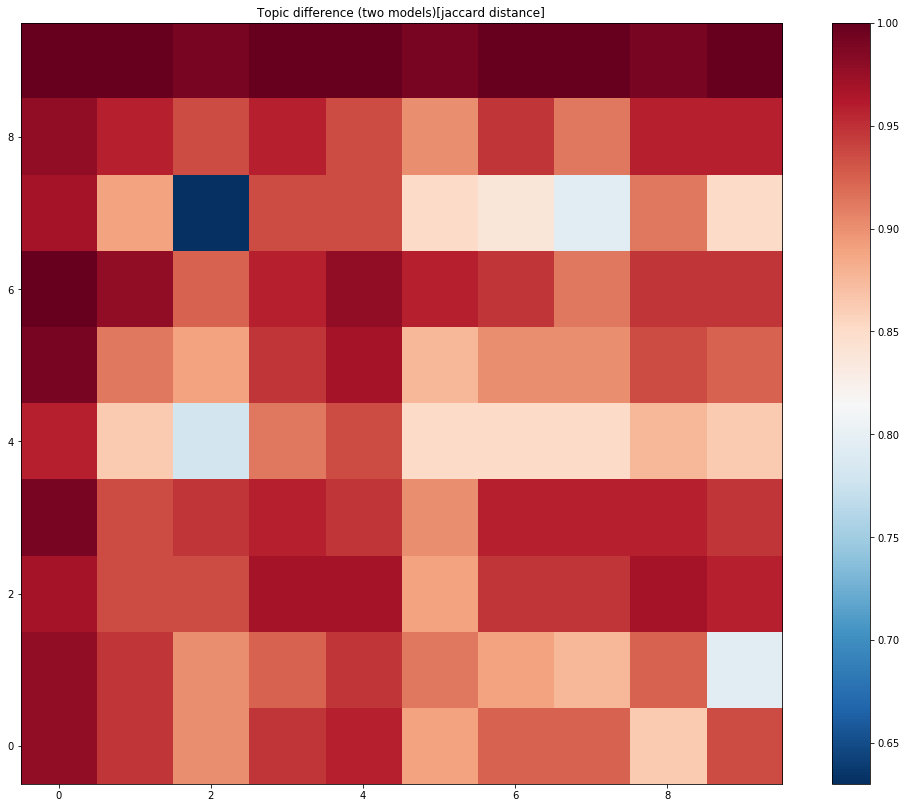

In [30]:
mdiff, annotation = ldamodel1.diff(ldamodel2, distance='jaccard', num_words=50)
plot_difference(mdiff, title="Topic difference (two models)[jaccard distance]", annotation=annotation)